# Linear Regression + k-means -- Age prediction
## Kulikov Alex, gr. 397

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn.feature_extraction.text import HashingVectorizer

%pylab inline
%load_ext autoreload
%autoreload 2

from IPython.core.display import HTML
HTML("<style>.container { width:90% !important; }</style>")

Populating the interactive namespace from numpy and matplotlib


## Data analysis

### age

In [35]:
age_train_df = pd.read_csv('kaggle_data/age_profile_train', header=None, delimiter='\t')
age_train_df.columns = ['id', 'age']

In [36]:
age_train_df.head()

,id,age
0,000000013CB5719C0000A2C90002C101,53
1,00000001442BE24000001B7D00F50801,48
2,00000001448580F800003F1B31FB0901,28
3,0000000145BDB2FF000157971645E901,44
4,000000014602771F0000DB9359714C01,48


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f42916b0f50>]], dtype=object)

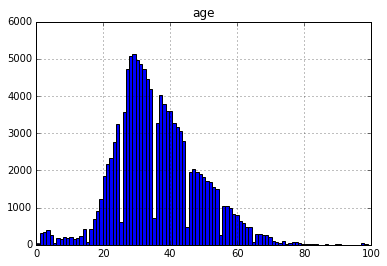

In [37]:
age_train_df.hist(column="age", bins=100)

### urls

In [38]:
urls_train_df = pd.read_csv('kaggle_data/url_domain_train', header=None, delimiter='\t')
urls_train_df.columns = ['id', 'url', 'count']

In [39]:
urls_train_df.head()

,id,url,count
0,000000014B60815F65B38258011B6C01,login.rutracker.org,1
1,000000014B60815F65B38258011B6C01,rutracker.org,4
2,000000014C03DA2A47AC433A0C755201,admin.tour-spb.net,1
3,000000014C03DA2A47AC433A0C755201,czinfo.ru,1
4,000000014C03DA2A47AC433A0C755201,forumsostav.ru,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4290c75fd0>]], dtype=object)

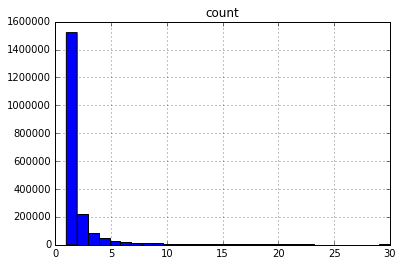

In [40]:
urls_train_df.hist(column="count", bins=30)

#### For this time, we omit the "count" column

In [41]:
urls_train_df = pd.DataFrame(urls_train_df.groupby('id')['url'].apply(lambda x: x.tolist()))
urls_train_df['id'] = urls_train_df.index
urls_train_df.index = range(len(urls_train_df))
urls_train_df.columns = ['urls', 'id']

In [42]:
urls_train_df.head()

,urls,id
0,"[id.rambler.ru, mail.rambler.ru, r0.ru]",000000013CB5719C0000A2C90002C101
1,"[1prime.ru, autorambler.ru, chellak.ru, docs.c...",00000001442BE24000001B7D00F50801
2,[bosch-korolev.ru],00000001448580F800003F1B31FB0901
3,"[aptekanizkihcen.ua, colady.ru, gorod.dp.ua, i...",0000000145BDB2FF000157971645E901
4,"[astrorok.ru, diets.ru, edaplus.info, eshzdoro...",000000014602771F0000DB9359714C01


### titles

In [43]:
titles_train_df = pd.read_csv('kaggle_data/title_unify_train', header=None, delimiter='\t')
titles_train_df.columns = ['id', 'title', 'count']

In [44]:
titles_train_df.head()

,id,title,count
0,000000014B6D41C13D777E8314725401,коляна лента прикол,1
1,0000000150707ACB8A82451C0307BC01,candi410 rambler ru входящая рамблер-почта,1
2,0000000150707ACB8A82451C0307BC01,cosmopolitan витамин волос для женщина журнал ...,1
3,0000000150707ACB8A82451C0307BC01,realbox бокс для интернет-магазин страница тов...,1
4,0000000150707ACB8A82451C0307BC01,realbox бокс для интернет-магазин товар экипир...,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4290c81d90>]], dtype=object)

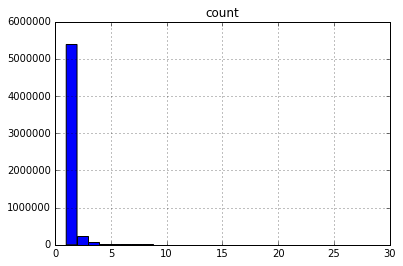

In [45]:
titles_train_df.hist(column="count", bins=30)

#### Here too

In [46]:
titles_train_df = pd.DataFrame(titles_train_df.groupby('id')['title'].apply(lambda x: x.tolist()))
titles_train_df['id'] = titles_train_df.index
titles_train_df.index = range(len(titles_train_df))
titles_train_df.columns = ['titles', 'id']

In [47]:
titles_train_df.head()

,titles,id
0,[бесплатный надёжный почта рамблер электронный...,000000013CB5719C0000A2C90002C101
1,[24-х 34-х до договор неделя новость предложит...,00000001442BE24000001B7D00F50801
2,"[авто бош контакт королёв сервис, авто бош кор...",00000001448580F800003F1B31FB0901
3,[ua втрать війни донбасі за на новини озвучить...,0000000145BDB2FF000157971645E901
4,"[black walnut грецкий орех чёрный, inmoment ru...",000000014602771F0000DB9359714C01


### merge it all!

In [48]:
# train_df = urls_train_df.merge(age_train_df, on='id', how='left') # to start, we'll consider only urls
# train_df = titles_train_df.merge(age_train_df, on='id', how='left')
train_df = urls_train_df.merge(titles_train_df.merge(age_train_df, on='id', how='inner'), on='id', how='inner')

In [49]:
train_df.head()

,urls,id,titles,age
0,"[id.rambler.ru, mail.rambler.ru, r0.ru]",000000013CB5719C0000A2C90002C101,[бесплатный надёжный почта рамблер электронный...,53
1,"[1prime.ru, autorambler.ru, chellak.ru, docs.c...",00000001442BE24000001B7D00F50801,[24-х 34-х до договор неделя новость предложит...,48
2,[bosch-korolev.ru],00000001448580F800003F1B31FB0901,"[авто бош контакт королёв сервис, авто бош кор...",28
3,"[aptekanizkihcen.ua, colady.ru, gorod.dp.ua, i...",0000000145BDB2FF000157971645E901,[ua втрать війни донбасі за на новини озвучить...,44
4,"[astrorok.ru, diets.ru, edaplus.info, eshzdoro...",000000014602771F0000DB9359714C01,"[black walnut грецкий орех чёрный, inmoment ru...",48


In [50]:
print(train_df.shape)
print(type(train_df))

(114090, 4)
<class 'pandas.core.frame.DataFrame'>


## A clever experiment

In [51]:
X_train_matrix, y_train = train_df.loc[:, ["urls"]].as_matrix(), train_df.loc[:, ["age"]]
# print(X_train)
# X_train_matrix, y_train = train_df.loc[:, ["urls", "titles"]].as_matrix(), train_df.loc[:, ["label"]]
X_train = train_df.urls.values
for index in range(X_train_matrix.shape[0]):
    X_train[index] = map(lambda x: ' '.join(x), X_train_matrix[index])[0]
print(X_train)
print(X_train.shape)
print(type(X_train))
%time hw = HashingVectorizer(n_features=1000)
%time X_train = hw.transform(X_train)
print(X_train.shape)
print(y_train.shape)

['id.rambler.ru mail.rambler.ru r0.ru'
 '1prime.ru autorambler.ru chellak.ru docs.cntd.ru echo.msk.ru expert.ru finance.rambler.ru forbes.ru forum.ixbt.com garant.ru govoritmoskva.ru kommersant.ru kp.ru lenta.ru mait.ru metronews.ru mk.ru news.rambler.ru news.smi2.ru norm-load.ru pfr.kirov.ru pfrf.ru photography-on-the.ru realty.rambler.ru ren.tv riafan.ru rns.online rossbanki.ru secretmag.ru tehnorma.ru tiu.ru top68.ru tvc.ru tvzvezda.ru vesti.ru video.rambler.ru weekend.rambler.ru'
 'bosch-korolev.ru' ...,
 'aif.ru autochel.ru chelyabinsk.ru id.rambler.ru khl.ru m.rambler.ru m.rsport.ru mail-pda.rambler.ru news.rambler.ru pnevmoshop.ru'
 'blog.partisani.ge li.ru tvrain.ru'
 'doctorkirov.ru drive.ru extrim-park43.ru m.regions.pulset.ru mail-pda.rambler.ru reso.ru sberbank.ru']
(114090,)
<type 'numpy.ndarray'>
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 41 µs
CPU times: user 7.21 s, sys: 66.7 ms, total: 7.27 s
Wall time: 7.38 s
(114090, 1000)
(114090, 1)


In [52]:
dense_matrix = [[b for _,b in sub] for sub in X_train]

ValueError: need more than 1 value to unpack

In [33]:
from matplotlib import pyplot

X_train.todense()

int_X_train = numpy.zeros(shape = (X_train.shape[0], X_train.shape[1]))

for row in range(X_train.shape[0]):
    int_X_train[row] = X_train[row].astype(int)
    
print(int_X_train)
    

plt.imshow(X_train.astype(int),
           interpolation="nearest", cmap = "Blues")
plt.show()

ValueError: row, column, and data array must all be the same length

## Relabeling data into groups

In [20]:
train_df['label'] = pd.Series(np.zeros(train_df.shape[0]), index=train_df.index)

In [21]:
X_train, y_train = train_df.loc[:, ["urls", "titles"]], train_df.loc[:, ["age"]]

In [22]:
print(y_train)
print(type(y_train))

        age
0        53
1        48
2        28
3        44
4        48
5        36
6        33
7        41
8        51
9        32
10       29
11       36
12       35
13       37
14       37
15       31
16       34
17       24
18       34
19       19
20       40
21       39
22       43
23       27
24       26
25       33
26       51
27       48
28       23
29       27
...     ...
114060   44
114061   44
114062   39
114063   42
114064   39
114065    6
114066   50
114067   30
114068   40
114069   29
114070   29
114071   31
114072   33
114073   26
114074   20
114075   24
114076   51
114077   28
114078   41
114079   46
114080   58
114081   31
114082   32
114083   44
114084   34
114085   34
114086   26
114087   58
114088   56
114089   31

[114090 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [23]:
train_df.set_value(y_train[y_train["age"].isin(range(0, 27))].index, "label", 1)
train_df.set_value(y_train[y_train["age"].isin(range(27, 31))].index, "label", 2)
train_df.set_value(y_train[y_train["age"].isin(range(31, 35))].index, "label", 3)
train_df.set_value(y_train[y_train["age"].isin(range(35, 41))].index, "label", 4)
train_df.set_value(y_train[y_train["age"].isin(range(41, 49))].index, "label", 5)
train_df.set_value(y_train[y_train["age"] > 49].index, "label", 6)

,urls,id,titles,age,label
0,"[id.rambler.ru, mail.rambler.ru, r0.ru]",000000013CB5719C0000A2C90002C101,[бесплатный надёжный почта рамблер электронный...,53,6
1,"[1prime.ru, autorambler.ru, chellak.ru, docs.c...",00000001442BE24000001B7D00F50801,[24-х 34-х до договор неделя новость предложит...,48,5
2,[bosch-korolev.ru],00000001448580F800003F1B31FB0901,"[авто бош контакт королёв сервис, авто бош кор...",28,2
3,"[aptekanizkihcen.ua, colady.ru, gorod.dp.ua, i...",0000000145BDB2FF000157971645E901,[ua втрать війни донбасі за на новини озвучить...,44,5
4,"[astrorok.ru, diets.ru, edaplus.info, eshzdoro...",000000014602771F0000DB9359714C01,"[black walnut грецкий орех чёрный, inmoment ru...",48,5
5,"[agroru.com, donupak.ru, meteonova.ru, rus-map...",0000000147B2D6F311DB5C4201B7FB01,[апрель год день март месяц на неделя от погод...,36,4
6,"[9tv.co.il, katalogturbaz.ru, nanotara.ru, ofi...",0000000147C68954150168D701A8B801,[rankw ru tovar xoz xoz-tovar анализ доход ком...,33,3
7,"[arbitr.ru, consultant.ru, utexco.ru]",0000000147EB76D738CD80750C879701,[возможность госзакупка консультант малое плюс...,41,5
8,"[1tv.ru, arhinovosti.ru, bilettorg.ru, dev.diz...",00000001482AAFB69FA5228008AC2A01,[13d билет заказать имя купить на спектакль те...,51,6
9,"[bibliotekar.ru, casinoaltair.com, expertiza34...",0000000148390BB56A6B22BB178D3901,[1-метр velol александр альберто арно велоспор...,32,3


In [ ]:
train_df.set_value(y_train[y_train["age"].isin(range(0, 10))].index, "label", 1)
train_df.set_value(y_train[y_train["age"].isin(range(10, 20))].index, "label", 2)
train_df.set_value(y_train[y_train["age"].isin(range(20, 30))].index, "label", 3)
train_df.set_value(y_train[y_train["age"].isin(range(30, 40))].index, "label", 4)
train_df.set_value(y_train[y_train["age"].isin(range(40, 50))].index, "label", 5)
train_df.set_value(y_train[y_train["age"].isin(range(50, 60))].index, "label", 6)
train_df.set_value(y_train[y_train["age"].isin(range(60, 70))].index, "label", 7)
train_df.set_value(y_train[y_train["age"].isin(range(70, 80))].index, "label", 8)
train_df.set_value(y_train[y_train["age"].isin(range(80, 90))].index, "label", 9)
train_df.set_value(y_train[y_train["age"].isin(range(90, 100))].index, "label", 10)

In [24]:
print(train_df[train_df["label"] == 0].shape)

(1863, 5)


## Getting test data

### urls

In [25]:
urls_test_df = pd.read_csv('kaggle_data/url_domain_test', header=None, delimiter='\t')
urls_test_df.columns = ['id', 'url', 'count']
urls_test_df = urls_test_df[['id', 'url']]

In [26]:
urls_test_df = pd.DataFrame(urls_test_df.groupby('id')['url'].apply(lambda x: x.tolist()))
urls_test_df['id'] = urls_test_df.index
urls_test_df.index = range(len(urls_test_df))
urls_test_df.columns = ['urls', 'id']

In [27]:
urls_test_df.head()

,urls,id
0,"[1000bankov.ru, 1tv.ru, 4put.ru, argumenti.ru,...",000000014A02348E701552980349FF01
1,"[autorambler.ru, bilettorg.ru, dsol-druzhba.ru...",000000014A10EA183BF8594A0B2AB201
2,"[photosight.ru, rambler.ru]",000000014A4FE5C33A929D4C26943601
3,"[base.consultant.ru, dogovor-obrazets.ru, fd.r...",000000014B7BB9957784A9BC0AC9F401
4,"[assessor.ru, audit-it.ru, base.garant.ru, com...",000000014C7749F896D82C2B01E8B801


### titles

In [28]:
titles_test_df = pd.read_csv('kaggle_data/title_unify_train', header=None, delimiter='\t')
titles_test_df.columns = ['id', 'title', 'count']
titles_test_df = titles_test_df[['id', 'title']]

In [29]:
titles_test_df = pd.DataFrame(titles_test_df.groupby('id')['title'].apply(lambda x: x.tolist()))
titles_test_df['id'] = titles_test_df.index
titles_test_df.index = range(len(titles_test_df))
titles_test_df.columns = ['titles', 'id']

In [30]:
titles_test_df.head()

,titles,id
0,[бесплатный надёжный почта рамблер электронный...,000000013CB5719C0000A2C90002C101
1,[24-х 34-х до договор неделя новость предложит...,00000001442BE24000001B7D00F50801
2,"[авто бош контакт королёв сервис, авто бош кор...",00000001448580F800003F1B31FB0901
3,[ua втрать війни донбасі за на новини озвучить...,0000000145BDB2FF000157971645E901
4,"[black walnut грецкий орех чёрный, inmoment ru...",000000014602771F0000DB9359714C01


### merge

In [31]:
X_urls_test = urls_test_df.urls.values
X_urls_test = map(lambda x: ' '.join(x), X_urls_test)
%time hw = HashingVectorizer(n_features=1000).fit(X_urls_test)
X_urls_test = hw.transform(X_urls_test).todense()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 41 µs


In [32]:
print(X_urls_test.shape)

(19974, 1000)


## 1st level -- Linear Regression with 6 equal-sized buckets

In [33]:
X_train_matrix, y_train = train_df.loc[:, ["urls"]].as_matrix(), train_df.loc[:, ["label"]]
# print(X_train)
# X_train_matrix, y_train = train_df.loc[:, ["urls", "titles"]].as_matrix(), train_df.loc[:, ["label"]]
X_train = train_df.urls.values
for index in range(X_train_matrix.shape[0]):
    X_train[index] = map(lambda x: ' '.join(x), X_train_matrix[index])[0]
print(X_train)
print(X_train.shape)
print(type(X_train))
%time hw = HashingVectorizer(n_features=1000)
%time X_train = hw.transform(X_train)
print(X_train.shape)
print(y_train.shape)

['id.rambler.ru mail.rambler.ru r0.ru'
 '1prime.ru autorambler.ru chellak.ru docs.cntd.ru echo.msk.ru expert.ru finance.rambler.ru forbes.ru forum.ixbt.com garant.ru govoritmoskva.ru kommersant.ru kp.ru lenta.ru mait.ru metronews.ru mk.ru news.rambler.ru news.smi2.ru norm-load.ru pfr.kirov.ru pfrf.ru photography-on-the.ru realty.rambler.ru ren.tv riafan.ru rns.online rossbanki.ru secretmag.ru tehnorma.ru tiu.ru top68.ru tvc.ru tvzvezda.ru vesti.ru video.rambler.ru weekend.rambler.ru'
 'bosch-korolev.ru' ...,
 'aif.ru autochel.ru chelyabinsk.ru id.rambler.ru khl.ru m.rambler.ru m.rsport.ru mail-pda.rambler.ru news.rambler.ru pnevmoshop.ru'
 'blog.partisani.ge li.ru tvrain.ru'
 'doctorkirov.ru drive.ru extrim-park43.ru m.regions.pulset.ru mail-pda.rambler.ru reso.ru sberbank.ru']
(114090,)
<type 'numpy.ndarray'>
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 15 µs
CPU times: user 6.4 s, sys: 40 ms, total: 6.44 s
Wall time: 6.39 s
(114090, 1000)
(114090, 1)


In [34]:
reg = LinearRegression()
%time reg.fit(X_train, y_train)

CPU times: user 1.17 s, sys: 10 ms, total: 1.18 s
Wall time: 1.17 s


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
y_pred_labels = reg.predict(X_urls_test).round()

In [36]:
print(y_pred_labels)

[[ 4.]
 [ 4.]
 [ 4.]
 ..., 
 [ 3.]
 [ 3.]
 [ 5.]]


In [37]:
urls_test_df["label"] = y_pred_labels

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa88d1e7d10>]], dtype=object)

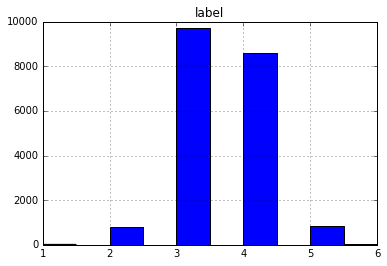

In [38]:
urls_test_df.hist(column="label")

In [39]:
urls_test_df['age'] = pd.Series(np.zeros(urls_test_df.shape[0]), index=urls_test_df.index)

In [40]:
print(urls_test_df)

                                                    urls  \
0      [1000bankov.ru, 1tv.ru, 4put.ru, argumenti.ru,...   
1      [autorambler.ru, bilettorg.ru, dsol-druzhba.ru...   
2                            [photosight.ru, rambler.ru]   
3      [base.consultant.ru, dogovor-obrazets.ru, fd.r...   
4      [assessor.ru, audit-it.ru, base.garant.ru, com...   
5      [mail.rambler.ru, mineral.ru, nalog.ru, nova.r...   
6      [101.ru, 2do2go.ru, antikvar.su, antikvariat74...   
7      [63.ru, deti-club.ru, k-agent.ru, mail.rambler...   
8      [1tv.ru, aif.ru, allbanks.kz, auto.drom.ru, au...   
9      [auto.drom.ru, autorambler.ru, drom.ru, eva.ru...   
10     [6lib.ru, belogorck.ru, gazeta.ru, informio.ru...   
11                         [mail.rambler.ru, rambler.ru]   
12     [aeroflot.ru, id.rambler.ru, mail.rambler.ru, ...   
13     [1000-tovarov.ru, a-lpha.su, aenergetika.ru, a...   
14     [3-ndfl.com, citytraffic.ru, consultant.ru, co...   
15     [dni.ru, games.kanobu.ru, goodhou

## 2nd level -- k-means with several centroids

In [44]:
from sklearn.cluster import KMeans
from pandas import Index

n_of_clusters = [27, 4, 4, 6, 8, 50]
start_age = [0, 27, 31, 35, 40, 49]

for label in range(1, 7):
    df_subset = train_df[train_df["label"] == label]
    print(df_subset.shape)
    X_train_matrix, y_train = df_subset.loc[:, ["urls"]].as_matrix(), df_subset.loc[:, ["age"]]
#     print(X_train_matrix)
#     print(X_train_matrix.shape)
    # X_train_matrix, y_train = train_df.loc[:, ["urls", "titles"]].as_matrix(), train_df.loc[:, ["label"]]
    X_train = df_subset.urls.values.copy()
#     print(X_train)
    for index in range(X_train_matrix.shape[0]):
        X_train[index] = X_train_matrix[index][0]
#     print(X_train)
#     print(X_train.shape)
#     print(type(X_train))
    test_subset = urls_test_df[urls_test_df["label"] == label].urls
    if test_subset.shape[0] == 0:
        continue
#     print(test_subset)
#     print(test_subset.shape)
#     print(test_subset.index)
    %time hw = HashingVectorizer(n_features=1000)
    %time X_train = hw.transform(X_train)
    %time km = KMeans(n_of_clusters[label - 1], n_jobs=-1)
    %time km.fit(X_train, y_train)
    test_subset_m = map(lambda x: ' '.join(x), test_subset)
    %time hw = HashingVectorizer(n_features=1000).fit(test_subset_m)
    test_subset_m = hw.transform(test_subset_m).todense()
    y_pred_subset = km.predict(test_subset_m)
#     print(y_pred_subset)
#     test_subset['age'] = y_pred_subset
    g = 0
    for index, data in test_subset.iteritems():
#         print(index)
        urls_test_df.set_value(index, "age", y_pred_subset[g] + start_age[label - 1])
        g += 1
#     print(urls_test_df.loc[3202, "age"])
#     km.predict()


(22226, 5)
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 15 µs
CPU times: user 1.18 s, sys: 16.7 ms, total: 1.19 s
Wall time: 1.18 s
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 16 µs
CPU times: user 777 ms, sys: 157 ms, total: 933 ms
Wall time: 15.6 s
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 56 µs
(18969, 5)
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 13.1 µs
CPU times: user 1.07 s, sys: 6.67 ms, total: 1.08 s
Wall time: 1.05 s
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 16 µs
CPU times: user 733 ms, sys: 123 ms, total: 857 ms
Wall time: 4.77 s
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 57 µs
(17358, 5)
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 12.9 µs
CPU times: user 930 ms, sys: 10 ms, total: 940 ms
Wall time: 931 ms
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 29.1 µs
CPU times: user 723 ms, sys: 137 ms, total: 860 ms
Wall time: 3.91 s
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall 

In [45]:
print(urls_test_df.loc[3202, "age"])

11.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8648f9050>]], dtype=object)

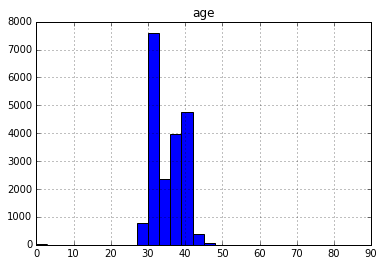

In [50]:
urls_test_df.hist(column="age", bins=30)

## Model testing

In [ ]:
reg = LinearRegression(normalize=True, n_jobs=-1)
%time cross_val_score(reg, X_train, y_train, scoring='mean_squared_error')

## Solution Gathering

In [52]:
urls_test_df = urls_test_df[['id', 'age']]
urls_test_df.columns = ['Id', 'age']

In [53]:
urls_test_df.head()

,Id,age
0,000000014A02348E701552980349FF01,39
1,000000014A10EA183BF8594A0B2AB201,36
2,000000014A4FE5C33A929D4C26943601,36
3,000000014B7BB9957784A9BC0AC9F401,34
4,000000014C7749F896D82C2B01E8B801,31


In [54]:
random_sol = pd.read_csv('random_solution.csv')
miss_idx = set(random_sol.Id.values) - set(urls_test_df.Id.values)
miss_df = pd.DataFrame(zip(list(miss_idx), np.ones(len(miss_idx))))
miss_df.columns = ['Id', 'age']
miss_df.age = 30

In [55]:
urls_test_df = urls_test_df.append(miss_df, ignore_index=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8644a91d0>]], dtype=object)

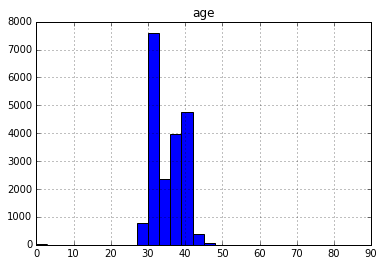

In [60]:
urls_test_df.hist(column="age", bins=30)

In [57]:
urls_test_df.to_csv('solution.csv', index=False)

In [58]:
!wc -l solution.csv

19980 solution.csv


In [59]:
def down_dimensions(cur_df):
    print(cur_df.shape)
    X_train_matrix, y_train = cur_df.loc[:, ["urls", "titles"]].as_matrix(), cur_df.loc[:, ["label"]]
    X_train = cur_df.urls.values
    for index in range(X_train_matrix.shape[0]):
        tmp = map(lambda x: ' '.join(x), X_train_matrix[index])
        X_train[index] = tmp[0] + ' ' + tmp[1]
    %time hw = HashingVectorizer(n_features=1000).fit(X_train)
    %time X_train = hw.transform(X_train).todense()
    print(X_train.shape)
    print(y_train.shape)
    return X_train, y_train